In [4]:
from requests import get
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import folium
from CLEARapi import get_info

In [3]:
url = "https://data.cityofchicago.org/resource/crimes.json?$order=date%20DESC&$limit=1250000"
response = get(url, headers={"X-App-Token":"eQexwCiZsieQyjfCAdnzDBlUs"})
print(response.status_code)

200


In [6]:
''''def get_info():
    if response.status_code == 200:
        return json.loads(response.content.decode('utf-8'))
    else:
        return None'''

data = get_info()

In [7]:
Crime = pd.DataFrame(data)


In [8]:
Crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250000 entries, 0 to 1249999
Data columns (total 22 columns):
arrest                  1250000 non-null bool
beat                    1250000 non-null object
block                   1250000 non-null object
case_number             1250000 non-null object
community_area          1249998 non-null object
date                    1250000 non-null object
description             1250000 non-null object
district                1249999 non-null object
domestic                1250000 non-null bool
fbi_code                1250000 non-null object
id                      1250000 non-null object
iucr                    1250000 non-null object
latitude                1210000 non-null object
location                1210000 non-null object
location_description    1246032 non-null object
longitude               1210000 non-null object
primary_type            1250000 non-null object
updated_on              1250000 non-null object
ward                    124

In [9]:
Crime.date.min(), Crime.date.max()

('2014-09-30T09:37:00.000', '2019-06-19T23:58:00.000')

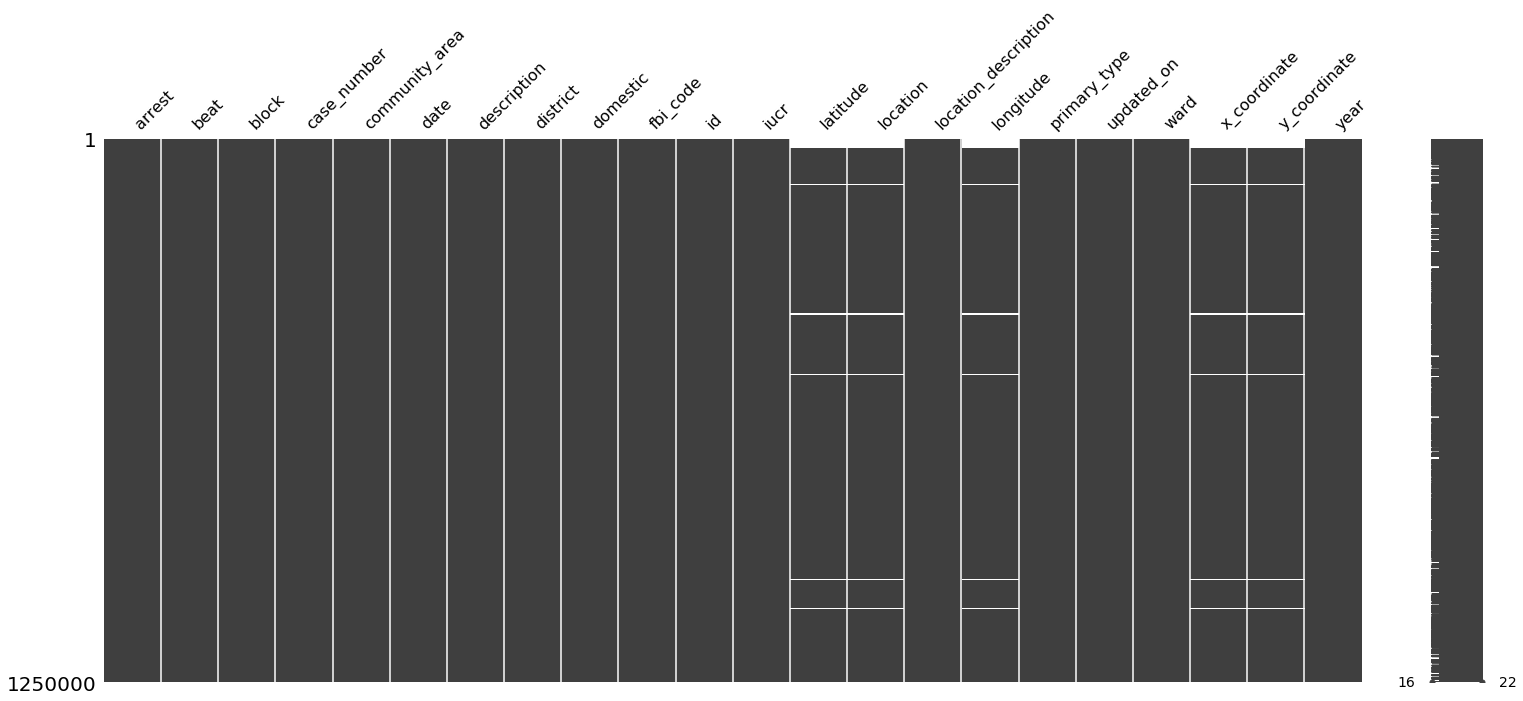

In [10]:
msno.matrix(Crime)

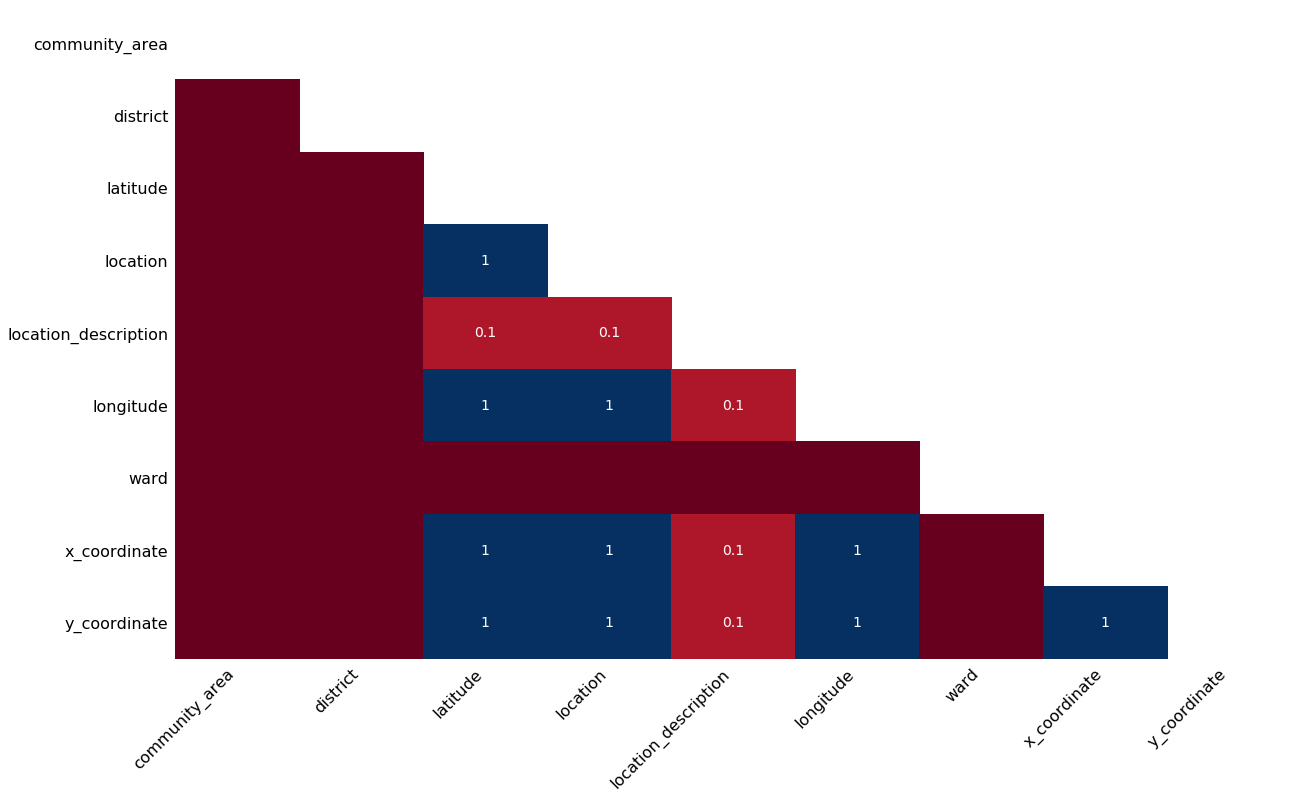

In [11]:
msno.heatmap(Crime)

In [12]:
Crime.head()

,arrest,beat,block,case_number,community_area,date,description,district,domestic,fbi_code,...,latitude,location,location_description,longitude,primary_type,updated_on,ward,x_coordinate,y_coordinate,year
0,False,2531,018XX N MASON AVE,JC313799,25,2019-06-19T23:58:00.000,DOMESTIC BATTERY SIMPLE,025,True,08B,...,NaN,NaN,STREET,NaN,BATTERY,2019-06-26T16:18:16.000,29,NaN,NaN,2019
1,False,1654,005XX W OHARE ST,JC313822,76,2019-06-19T23:55:00.000,THEFT/RECOVERY: AUTOMOBILE,016,False,07,...,NaN,NaN,AIRPORT VENDING ESTABLISHMENT,NaN,MOTOR VEHICLE THEFT,2019-06-26T16:18:16.000,41,NaN,NaN,2019
2,False,0632,084XX S MICHIGAN AVE,JC313807,44,2019-06-19T23:55:00.000,SIMPLE,006,True,08A,...,NaN,NaN,RESIDENCE,NaN,ASSAULT,2019-06-26T16:18:16.000,6,NaN,NaN,2019
3,True,0633,091XX S COTTAGE GROVE AVE,JC313820,44,2019-06-19T23:50:00.000,OVER $500,006,False,06,...,NaN,NaN,STREET,NaN,THEFT,2019-06-26T16:18:16.000,8,NaN,NaN,2019
4,False,1924,035XX N CLARK ST,JC315639,6,2019-06-19T23:50:00.000,OVER $500,019,False,06,...,NaN,NaN,SIDEWALK,NaN,THEFT,2019-06-26T16:18:16.000,44,NaN,NaN,2019


In [13]:
Crime.dropna(inplace=True)
Crime.latitude = Crime.latitude.astype(float)
Crime.longitude = Crime.longitude.astype(float)

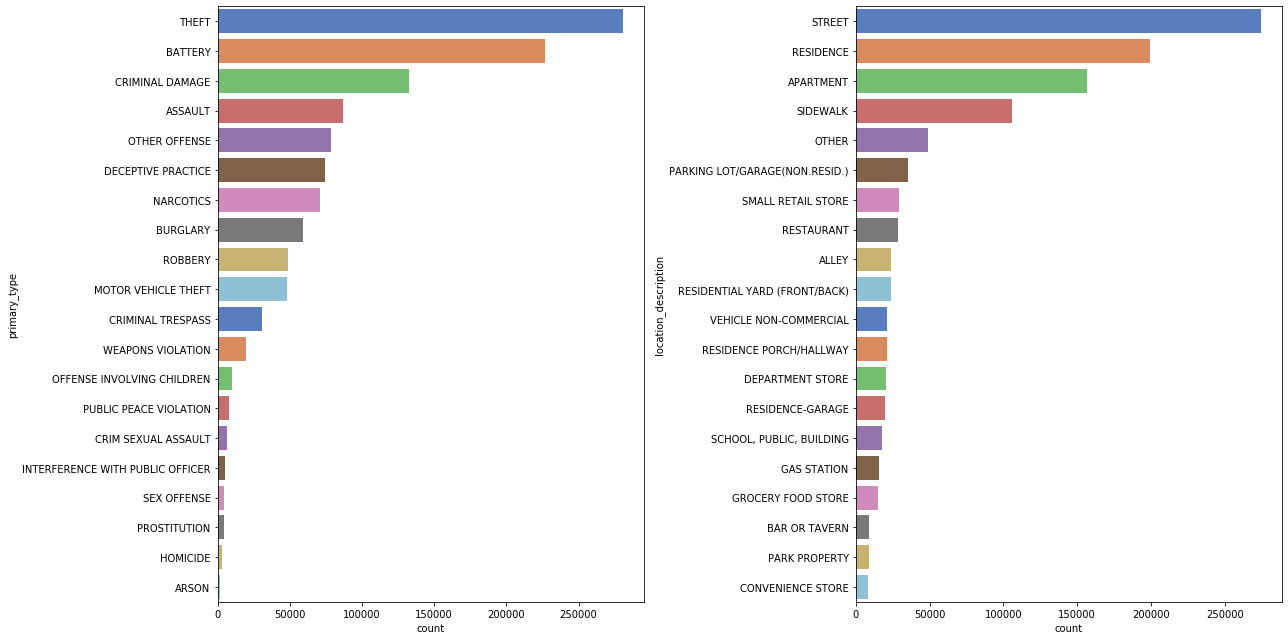

In [17]:
fig, ax =plt.subplots(1,2, figsize=(18,9))

sns.countplot(y= 'primary_type', data = Crime, palette = 'muted', order = Crime['primary_type'].value_counts().iloc[:20].index, ax=ax[0])
sns.countplot(y= 'location_description', data = Crime, palette = 'muted', order = Crime['location_description'].value_counts().iloc[:20].index, ax=ax[1])
plt.tight_layout()
plt.show()


In [15]:
Chi_Coordinates = (41.8781, -87.6298)
map = folium.Map(location=Chi_Coordinates, zoom_start=12)

In [16]:
for x in range(1000):
    lat = Crime.iloc[x].latitude
    lon = Crime.iloc[x].longitude
    folium.CircleMarker(location = [lat, lon], popup=Crime.iloc[x].primary_type, radius = 2).add_to(map)
    
map

In [ ]:
''''mapa = folium.Map(location=Chi_Coordinates, zoom_start=12)
for x in Crime[Crime.primary_type=="PROSTITUTION"].iterrows():
    lat = x[1][12]
    lon = x[1][15]
    folium.CircleMarker(location = [lat, lon], popup=x[1][0], radius = 2).add_to(mapa)
mapa.save(outfile= "hookers.html")'''

In [ ]:
'''''mapb = folium.Map(location=Chi_Coordinates, zoom_start=12)
for x in Crime[Crime.primary_type=="NARCOTICS"].iterrows():
    lat = x[1][12]
    lon = x[1][15]
    folium.CircleMarker(location = [lat, lon], popup=x[1][0], radius = 2).add_to(mapb)
mapb.save(outfile= "drugs.html")''''''

In [ ]:
def map_creator(df, crime_type, save_name):
    map3 = folium.Map(location=Chi_Coordinates, zoom_start=12)
    for x in df[df.primary_type==crime_type].iterrows():
        lat = x[1][12]
        lon = x[1][15]
        folium.CircleMarker(location = [lat, lon], popup=x[1][0], radius = 2).add_to(map3)
    map3.save(outfile= save_name)

In [ ]:
map_creator(Crime, "WEAPONS VIOLATION", "guns.html")

In [ ]:
map_creator(Crime, "HOMICIDE", "murders.html")

In [18]:
Crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1207327 entries, 71 to 1249999
Data columns (total 22 columns):
arrest                  1207327 non-null bool
beat                    1207327 non-null object
block                   1207327 non-null object
case_number             1207327 non-null object
community_area          1207327 non-null object
date                    1207327 non-null object
description             1207327 non-null object
district                1207327 non-null object
domestic                1207327 non-null bool
fbi_code                1207327 non-null object
id                      1207327 non-null object
iucr                    1207327 non-null object
latitude                1207327 non-null float64
location                1207327 non-null object
location_description    1207327 non-null object
longitude               1207327 non-null float64
primary_type            1207327 non-null object
updated_on              1207327 non-null object
ward                    

In [19]:
Crime.head()

,arrest,beat,block,case_number,community_area,date,description,district,domestic,fbi_code,...,latitude,location,location_description,longitude,primary_type,updated_on,ward,x_coordinate,y_coordinate,year
71,False,0831,071XX S FAIRFIELD AVE,JC313130,66,2019-06-19T21:35:00.000,FIRST DEGREE MURDER,008,False,01A,...,41.763714,"{'latitude': '41.763714219', 'longitude': '-87...",STREET,-87.691782,HOMICIDE,2019-06-26T16:18:16.000,18,1159276,1857141,2019
349,False,2232,100XX S LOWE AVE,JC313110,73,2019-06-19T14:36:00.000,FIRST DEGREE MURDER,022,False,01A,...,41.711437,"{'latitude': '41.711437469', 'longitude': '-87...",STREET,-87.639309,HOMICIDE,2019-06-26T16:18:16.000,9,1173745,1838203,2019
1348,False,0312,065XX S DR MARTIN LUTHER KING JR DR,JC311051,69,2019-06-18T06:06:00.000,FIRST DEGREE MURDER,003,False,01A,...,41.776019,"{'latitude': '41.776018543', 'longitude': '-87...",PORCH,-87.615520,HOMICIDE,2019-06-25T16:19:57.000,20,1180044,1861789,2019
2064,False,1934,029XX N BROADWAY,JC309564,6,2019-06-17T02:35:00.000,FIRST DEGREE MURDER,019,False,01A,...,41.935855,"{'latitude': '41.935855273', 'longitude': '-87...",AUTO,-87.644258,HOMICIDE,2019-06-24T16:14:57.000,44,1171738,1919969,2019
2138,False,0414,078XX S LUELLA AVE,JC309467,43,2019-06-16T23:57:00.000,FIRST DEGREE MURDER,004,False,01A,...,41.752480,"{'latitude': '41.752480297', 'longitude': '-87...",STREET,-87.569903,HOMICIDE,2019-06-23T16:06:04.000,7,1192563,1853319,2019
